<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/genre_classification/Models_comparaison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

df=pd.read_csv('dataset/Spotify_train_dataset.csv')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data=df.drop(labels=['type','id','uri','track_href','analysis_url','song_name'],axis=1)

genres=['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop', 'techhouse', 'techno',
'trance', 'psytrance', 'trap', 'dnb', 'hardstyle']

le = LabelEncoder()
le.classes_=genres
data['genre']=le.transform(data['genre'])

X=data[data.columns[:-1]].to_numpy()
Y=data['genre'].to_numpy()


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Done
(25382, 13) (25382,) (6346, 13) (6346,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier 

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import graphviz
from sklearn.model_selection import cross_val_score




# Models set up

In [ ]:
#Models set up 

rd = RandomForestClassifier(max_depth=12, random_state=1,criterion='gini',n_estimators=700)
dt = DecisionTreeClassifier(max_depth=10, random_state=1)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm = SVC(kernel='rbf')
knn = KNeighborsClassifier(n_neighbors=1)
boost = GradientBoostingClassifier(n_estimators=200,verbose=1,max_features='sqrt')
lr =LogisticRegression(solver='newton-cg')
ada = AdaBoostClassifier(learning_rate=0.1)

models_name = ['Decision Tree\n Classifier','Random Forest\nClassifier','Linear Discr.\nAnalysis','Quadratic Discr.\nAnalysis','SVM','KNN','Gradient\nBoost Classifier','Logistic\nRegression','Adaboost','Neural Network','CNN']
models = [dt,rd,lda,qda,svm,knn,boost,lr,ada]

scores =[]

for model in models:
  
  #Split set
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  f1score = f1_score(Y_test,y_pred,average='micro')
  scores.append(f1score)





      Iter       Train Loss   Remaining Time 
         1       60111.0131            1.85m
         2       54613.2573            1.85m
         3       51597.1801            1.87m
         4       49087.5243            1.86m
         5       46568.8860            1.85m
         6       44330.4020            1.83m
         7       42424.2280            1.83m
         8       40972.7588            1.81m
         9       39587.1198            1.79m
        10       38191.9894            1.79m
        20       30312.3113            1.70m
        30       26536.0572            1.60m
        40       24357.4644            1.50m
        50       22931.1142            1.41m
        60       21963.1813            1.32m
        70       21243.7814            1.22m
        80       20634.8450            1.13m
        90       20137.6340            1.03m
       100       19677.5696           56.26s
       200       16896.4888            0.00s


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


#Scores comparaison with Bar graph 







## Plotting f1_score for each model


In [ ]:
# NeuralNetwork score
scores.append(0.6708162622124173)

#CNN score
scores.append(0.6802710368736212)

print(scores)

[0.6331547431452884, 0.6826347305389222, 0.5228490387645761, 0.6222817522849039, 0.2589032461393003, 0.33438386385124486, 0.6935077213993066, 0.45808383233532934, 0.4019855026788528, 0.6708162622124173, 0.6802710368736212]


In [ ]:
#Truncate the metrics

scores_round = []

for k in range(len(scores)):
  scores_round.append(round(scores[k],3))

print(scores_round)

[0.633, 0.683, 0.523, 0.622, 0.259, 0.334, 0.694, 0.458, 0.402, 0.671, 0.68]


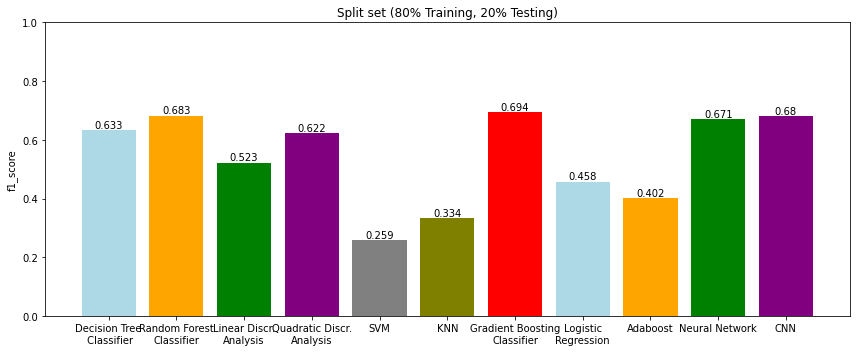

In [ ]:
# Bar graph Split set

colors = ['lightblue','orange','green','purple','grey','olive','red']

plt.figure(figsize=(12,5))
fig = plt.bar(models_name,scores_round,color=colors,width=0.8)


plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('f1_score')

for i in range(len(scores)):
    plt.annotate(str(scores_round[i]), xy=(i,scores_round[i]), ha='center', va='bottom')

plt.title("Split set (80% Training, 20% Testing)")

plt.tight_layout()

plt.show()

## Plot in the ascending order

In [ ]:
dict = {models_name[k]:scores_round[k] for k in range(len(scores_round))}
dict

{'Adaboost': 0.402,
 'CNN': 0.68,
 'Decision Tree\n Classifier': 0.633,
 'Gradient\nBoost Classifier': 0.694,
 'KNN': 0.334,
 'Linear Discr.\nAnalysis': 0.523,
 'Logistic\nRegression': 0.458,
 'Neural Network': 0.671,
 'Quadratic Discr.\nAnalysis': 0.622,
 'Random Forest\nClassifier': 0.683,
 'SVM': 0.259}

In [ ]:
#Sort the dictionnary by value

dict_sort = sorted(dict.items(), key=lambda item: item[1])

models_name_sort=[]
scores_round_sort=[]

for item in dict_sort:
  models_name_sort.append(item[0])
  scores_round_sort.append(item[1])

print(models_name_sort)
print(scores_round_sort)

['SVM', 'KNN', 'Adaboost', 'Logistic\nRegression', 'Linear Discr.\nAnalysis', 'Quadratic Discr.\nAnalysis', 'Decision Tree\n Classifier', 'Neural Network', 'CNN', 'Random Forest\nClassifier', 'Gradient\nBoost Classifier']
[0.259, 0.334, 0.402, 0.458, 0.523, 0.622, 0.633, 0.671, 0.68, 0.683, 0.694]


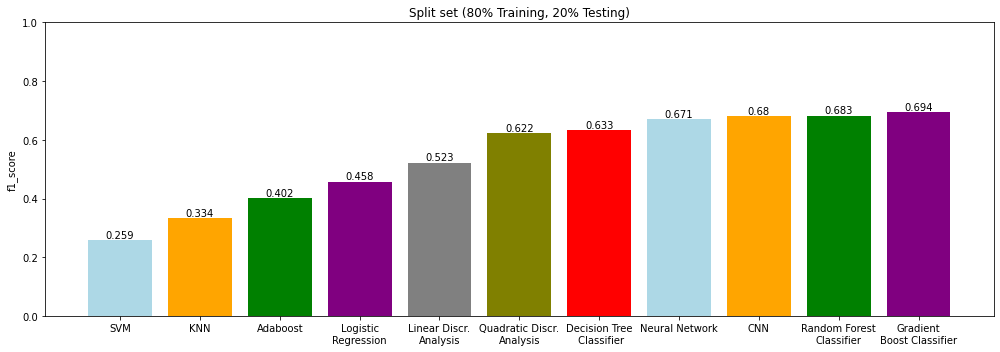

In [ ]:
# Bar graph Split set

colors = ['lightblue','orange','green','purple','grey','olive','red']

plt.figure(figsize=(14,5))
fig = plt.bar(models_name_sort,scores_round_sort,color=colors,width=0.8)


plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('f1_score')

for i in range(len(scores)):
    plt.annotate(str(scores_round_sort[i]), xy=(i,scores_round_sort[i]), ha='center', va='bottom')

plt.title("Split set (80% Training, 20% Testing)")

plt.tight_layout()

plt.show()